# Imports

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Split dataset of images

In [3]:
generator_train = ImageDataGenerator(rescale = 1./255,
                               rotation_range=7,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

In [4]:
dataset_train = generator_train.flow_from_directory('/content/drive/MyDrive/LEISHMANIOSE/dataset_classifier/train',
                                              target_size = (64, 64),
                                              batch_size = 8,
                                              class_mode = 'categorical',
                                              shuffle=True)

Found 62 images belonging to 2 classes.


In [5]:
dataset_train.class_indices

{'leishmaniose': 0, 'tuberculose_cutanea': 1}

In [6]:
generator_test = ImageDataGenerator(rescale = 1./255)

In [7]:
dataset_test = generator_test.flow_from_directory('/content/drive/MyDrive/LEISHMANIOSE/dataset_classifier/test',
                                              target_size = (64, 64),
                                              batch_size = 8,
                                              class_mode = 'categorical',
                                              shuffle=False)

Found 10 images belonging to 2 classes.


In [8]:
dataset_test.class_indices

{'leishmaniose': 0, 'tuberculose_cutanea': 1}

# Model Architecture

In [9]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))
classifier.add(Activation('relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3)))
classifier.add(Activation('relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(3137))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(3137))
classifier.add(Dropout(0.5))

classifier.add(Dense(2))
classifier.add(Activation('softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0

In [11]:
(6272 + 2) / 2

3137.0

# Model Train

In [12]:
history = classifier.fit(dataset_train,
                         epochs = 50)

Epoch 1/50
8/8 [==============================] - 31s 3s/step - loss: 35.0374 - accuracy: 0.5323
Epoch 2/50
8/8 [==============================] - 1s 60ms/step - loss: 37.3976 - accuracy: 0.6452
Epoch 3/50
8/8 [==============================] - 1s 63ms/step - loss: 30.9692 - accuracy: 0.7258
Epoch 4/50
8/8 [==============================] - 1s 61ms/step - loss: 47.8495 - accuracy: 0.5806
Epoch 5/50
8/8 [==============================] - 1s 65ms/step - loss: 33.6275 - accuracy: 0.6290
Epoch 6/50
8/8 [==============================] - 1s 61ms/step - loss: 25.5925 - accuracy: 0.6774
Epoch 7/50
8/8 [==============================] - 1s 58ms/step - loss: 18.8234 - accuracy: 0.7742
Epoch 8/50
8/8 [==============================] - 1s 63ms/step - loss: 21.4396 - accuracy: 0.6613
Epoch 9/50
8/8 [==============================] - 0s 56ms/step - loss: 22.3212 - accuracy: 0.7742
Epoch 10/50
8/8 [==============================] - 1s 61ms/step - loss: 10.5013 - accuracy: 0.7258
Epoch 11/50
8/8 [===

# Model Evaluate

In [13]:
dataset_test.class_indices

{'leishmaniose': 0, 'tuberculose_cutanea': 1}

In [14]:
predictions = classifier.predict(dataset_test)

2/2 [==============================] - 1s 1s/step


In [17]:
preds = np.argmax(predictions, axis=1)

In [18]:
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [19]:
dataset_test.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
print(classification_report(dataset_test.classes, preds))

              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.00      0.00      0.00         5

    accuracy                           0.40        10
   macro avg       0.22      0.40      0.29        10
weighted avg       0.22      0.40      0.29        10



In [26]:
cm = confusion_matrix(dataset_test.classes, preds)

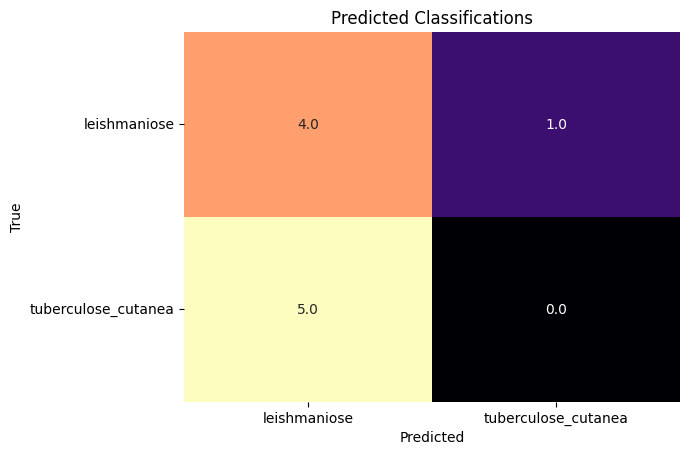

In [28]:
ax = sns.heatmap(cm, annot=True, fmt='.1f', cmap='magma', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted Classifications')
ax.set_xticklabels(['leishmaniose', 'tuberculose_cutanea',])
ax.set_yticklabels(['leishmaniose', 'tuberculose_cutanea'], rotation=0)
plt.show()

# Save Weigths

In [29]:
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
from keras.models import load_model
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [32]:
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [33]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [34]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0

In [35]:
# keras visualizer if needs

# Classifier image

In [37]:
import cv2
from google.colab.patches import cv2_imshow

In [38]:
image = cv2.imread('/content/drive/MyDrive/LEISHMANIOSE/dataset_classifier/test/leishmaniose/keratoacanthoma-9-42b_webp.rf.a78f8a7e39d09c35ea0875ef69d46490.jpg')

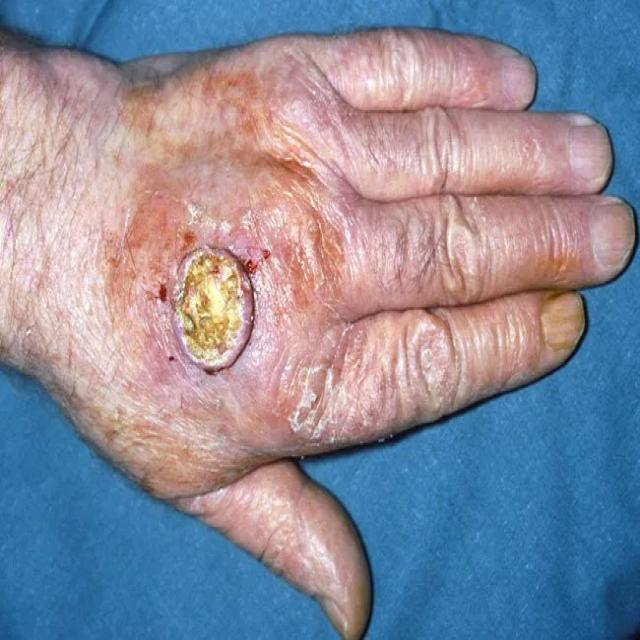

In [40]:
cv2_imshow(image)

In [41]:
image.shape

(640, 640, 3)

In [42]:
img = cv2.resize(image, (64, 64))

In [43]:
img = img / 255

In [44]:
img.shape

(64, 64, 3)

In [45]:
img = img.reshape(-1, 64, 64, 3)

In [46]:
img.shape

(1, 64, 64, 3)

In [47]:
previsao = loaded_model.predict(img)

1/1 [==============================] - 0s 265ms/step


In [55]:
previsao

array([[1.0000000e+00, 1.7734644e-08]], dtype=float32)

In [49]:
prev = np.argmax(previsao, axis=1)

In [50]:
prev

array([0])

In [51]:
dataset_test.class_indices

{'leishmaniose': 0, 'tuberculose_cutanea': 1}

In [52]:
if prev == 0:
  print('leishmaniose')
else:
  print('tuberculose_cutanea')

leishmaniose
